In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import pandas as pd

from scipy import stats
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("..\\project 1\\resale-flat-prices-based-on-registration-date-from-jan-2017-2021-aug.csv")

In [3]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105475 entries, 0 to 105474
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                105475 non-null  object 
 1   town                 105475 non-null  object 
 2   flat_type            105475 non-null  object 
 3   block                105475 non-null  object 
 4   street_name          105475 non-null  object 
 5   storey_range         105475 non-null  object 
 6   floor_area_sqm       105475 non-null  float64
 7   flat_model           105475 non-null  object 
 8   lease_commence_date  105475 non-null  int64  
 9   remaining_lease      105475 non-null  object 
 10  resale_price         105475 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 8.9+ MB


In [5]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

In [6]:
test=df['month']

In [7]:
test

0         2017-01
1         2017-01
2         2017-01
3         2017-01
4         2017-01
           ...   
105470    2021-08
105471    2021-08
105472    2021-08
105473    2021-08
105474    2021-08
Name: month, Length: 105475, dtype: object

In [8]:
df['month']=pd.to_datetime(df['month'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105475 entries, 0 to 105474
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                105475 non-null  datetime64[ns]
 1   town                 105475 non-null  object        
 2   flat_type            105475 non-null  object        
 3   block                105475 non-null  object        
 4   street_name          105475 non-null  object        
 5   storey_range         105475 non-null  object        
 6   floor_area_sqm       105475 non-null  float64       
 7   flat_model           105475 non-null  object        
 8   lease_commence_date  105475 non-null  int64         
 9   remaining_lease      105475 non-null  object        
 10  resale_price         105475 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 8.9+ MB


In [10]:
#df.set_index('month', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105475 entries, 0 to 105474
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                105475 non-null  datetime64[ns]
 1   town                 105475 non-null  object        
 2   flat_type            105475 non-null  object        
 3   block                105475 non-null  object        
 4   street_name          105475 non-null  object        
 5   storey_range         105475 non-null  object        
 6   floor_area_sqm       105475 non-null  float64       
 7   flat_model           105475 non-null  object        
 8   lease_commence_date  105475 non-null  int64         
 9   remaining_lease      105475 non-null  object        
 10  resale_price         105475 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 8.9+ MB


In [11]:
df['month']

0        2017-01-01
1        2017-01-01
2        2017-01-01
3        2017-01-01
4        2017-01-01
            ...    
105470   2021-08-01
105471   2021-08-01
105472   2021-08-01
105473   2021-08-01
105474   2021-08-01
Name: month, Length: 105475, dtype: datetime64[ns]

In [12]:
from datetime import datetime

In [13]:
df['month'].dtype

dtype('<M8[ns]')

In [14]:
df['year_only']= df['month'].dt.year
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year_only
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,2017
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,2017
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,2017
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,2017
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
105470,2021-08-01,YISHUN,EXECUTIVE,328,YISHUN RING RD,10 TO 12,146.0,Maisonette,1988,65 years 11 months,690000.0,2021
105471,2021-08-01,YISHUN,EXECUTIVE,277,YISHUN ST 22,04 TO 06,146.0,Maisonette,1985,63 years 01 month,620000.0,2021
105472,2021-08-01,YISHUN,EXECUTIVE,281,YISHUN ST 22,01 TO 03,152.0,Maisonette,1985,62 years 11 months,685000.0,2021
105473,2021-08-01,YISHUN,EXECUTIVE,614,YISHUN ST 61,07 TO 09,142.0,Apartment,1987,64 years 09 months,650000.0,2021


In [15]:
df.flat_type.unique()

array(['2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', '1 ROOM',
       'MULTI-GENERATION'], dtype=object)

In [8]:
threerm = df[df.flat_type=='3 ROOM']
fourrm = df[df.flat_type=='4 ROOM'] 

In [9]:
fiverm = df[df.flat_type=='5 ROOM']

In [10]:
threerm['flat_model'].unique()

array(['New Generation', 'Improved', 'Simplified', 'Model A', 'Standard',
       'Premium Apartment', 'DBSS', 'Terrace'], dtype=object)

In [11]:
fourrm['flat_model'].unique()

array(['New Generation', 'DBSS', 'Simplified', 'Improved', 'Model A',
       'Premium Apartment', 'Standard', 'Type S1', 'Model A2',
       'Adjoined flat', 'Terrace', 'Premium Apartment Loft'], dtype=object)

In [12]:
fiverm['flat_model'].unique()

array(['Standard', 'Improved', 'DBSS', 'Adjoined flat', 'Model A',
       'Premium Apartment', 'Model A-Maisonette', 'Type S2',
       'Improved-Maisonette', 'Premium Apartment Loft'], dtype=object)

In [94]:
fiverm_all=fiverm.loc[(df.flat_model != 'Premium Apartment') & (df.flat_model != 'DBSS') & (df.flat_model != 'Terrace')& (df.flat_model != 'Premium Apartment Loft')& (df.flat_model != 'Type S1') ]
fiverm_all['flat_model'].unique()

array(['Standard', 'Improved', 'Adjoined flat', 'Model A',
       'Model A-Maisonette', 'Type S2', 'Improved-Maisonette'],
      dtype=object)

In [13]:
threerm_all=threerm.loc[(df.flat_model != 'Premium Apartment') & (df.flat_model != 'DBSS') & (df.flat_model != 'Terrace')]
threerm_all.flat_model.unique()

array(['New Generation', 'Improved', 'Simplified', 'Model A', 'Standard'],
      dtype=object)

In [76]:
fourrm_all=fourrm.loc[(df.flat_model != 'Premium Apartment') & (df.flat_model != 'DBSS') & (df.flat_model != 'Terrace')& (df.flat_model != 'Premium Apartment Loft') ]
fourrm_all['flat_model'].unique()

array(['New Generation', 'Simplified', 'Improved', 'Model A', 'Standard',
       'Type S1', 'Model A2', 'Adjoined flat'], dtype=object)

In [229]:
fourrm_all.median()

<ipython-input-229-08c7b7f82540>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  fourrm_all.median()


floor_area_sqm             93.0
lease_commence_date      1996.0
resale_price           398000.0
year_only                2018.0
dtype: float64

In [155]:
test=threerm.loc[(df.flat_model != 'Premium Apartment') & (df.flat_model != 'DBSS') & (df.flat_model != 'Terrace') ]
test

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year_only
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,2017
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,2017
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,2017
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,2017
5,2017-01-01,ANG MO KIO,3 ROOM,150,ANG MO KIO AVE 5,01 TO 03,68.0,New Generation,1981,63 years,275000.0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
80244,2020-09-01,YISHUN,3 ROOM,504B,YISHUN ST 51,07 TO 09,68.0,Model A,2016,94 years 07 months,318000.0,2020
80245,2020-09-01,YISHUN,3 ROOM,505A,YISHUN ST 51,01 TO 03,68.0,Model A,2016,94 years 07 months,298000.0,2020
80246,2020-09-01,YISHUN,3 ROOM,505B,YISHUN ST 51,01 TO 03,68.0,Model A,2016,94 years 06 months,290000.0,2020
80247,2020-09-01,YISHUN,3 ROOM,719,YISHUN ST 71,04 TO 06,64.0,Simplified,1987,66 years 01 month,254000.0,2020


In [156]:
test['flat_model'].unique()

array(['New Generation', 'Improved', 'Simplified', 'Model A', 'Standard'],
      dtype=object)

<AxesSubplot:ylabel='Frequency'>

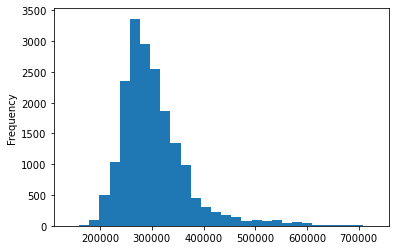

In [160]:
test['resale_price'].plot(kind='hist', bins=30)

In [15]:
#Create data by year
threerm_2017=threerm_all[threerm_all.year_only==2017]
threerm_2018=threerm_all[threerm_all.year_only==2018]
threerm_2019=threerm_all[threerm_all.year_only==2019]
threerm_2020=threerm_all[threerm_all.year_only==2020]
threerm_2021=threerm_all[threerm_all.year_only==2021]

fourrm_2017=fourrm_all[fourrm_all.year_only==2017]
fourrm_2018=fourrm_all[fourrm_all.year_only==2018]
fourrm_2019=fourrm_all[fourrm_all.year_only==2019]
fourrm_2020=fourrm_all[fourrm_all.year_only==2020]
fourrm_2021=fourrm_all[fourrm_all.year_only==2021]




In [96]:
fiverm_2017=fiverm_all[fiverm_all.year_only==2017]
fiverm_2018=fiverm_all[fiverm_all.year_only==2018]
fiverm_2019=fiverm_all[fiverm_all.year_only==2019]
fiverm_2020=fiverm_all[fiverm_all.year_only==2020]
fiverm_2021=fiverm_all[fiverm_all.year_only==2021]

In [98]:
fiverm_2021

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year_only
87667,2021-01-01,ANG MO KIO,5 ROOM,305,ANG MO KIO AVE 1,13 TO 15,123.0,Standard,1977,55 years 07 months,590000.0,2021
87668,2021-01-01,ANG MO KIO,5 ROOM,551,ANG MO KIO AVE 10,01 TO 03,118.0,Improved,1981,59 years 01 month,483000.0,2021
87669,2021-01-01,ANG MO KIO,5 ROOM,423,ANG MO KIO AVE 3,01 TO 03,133.0,Improved,1993,71 years 03 months,680000.0,2021
87670,2021-01-01,ANG MO KIO,5 ROOM,617,ANG MO KIO AVE 4,13 TO 15,133.0,Model A,1996,74 years 06 months,760000.0,2021
87671,2021-01-01,ANG MO KIO,5 ROOM,520,ANG MO KIO AVE 5,16 TO 18,118.0,Improved,1980,58 years 08 months,629000.0,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
105464,2021-08-01,YISHUN,5 ROOM,332,YISHUN RING RD,10 TO 12,122.0,Improved,1988,66 years 01 month,510000.0,2021
105465,2021-08-01,YISHUN,5 ROOM,161,YISHUN ST 11,10 TO 12,126.0,Improved,1985,62 years 11 months,550000.0,2021
105466,2021-08-01,YISHUN,5 ROOM,221,YISHUN ST 21,10 TO 12,121.0,Improved,1985,62 years 11 months,550000.0,2021
105467,2021-08-01,YISHUN,5 ROOM,505C,YISHUN ST 51,10 TO 12,113.0,Improved,2016,93 years 08 months,610000.0,2021


In [193]:
threerm_2017.median()

<ipython-input-193-293bf3f8f3ca>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  threerm_2017.median()


floor_area_sqm             67.0
lease_commence_date      1981.0
resale_price           300000.0
year_only                2017.0
dtype: float64

<AxesSubplot:xlabel='year_only', ylabel='resale_price'>

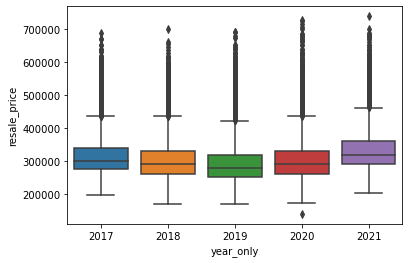

In [16]:
sns.boxplot(x=threerm_all['year_only'], y=threerm_all['resale_price'], data=threerm_all)


In [219]:
np.median(threerm_2018['resale_price',''])

290000.0

In [195]:
threerm_2019.median()

<ipython-input-195-5cc4f016bdb2>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  threerm_2019.median()


floor_area_sqm             67.0
lease_commence_date      1982.0
resale_price           280000.0
year_only                2019.0
dtype: float64

In [197]:
threerm_2020.median()

<ipython-input-197-935ddd7c6080>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  threerm_2020.median()


floor_area_sqm             67.0
lease_commence_date      1982.0
resale_price           283888.0
year_only                2020.0
dtype: float64

<AxesSubplot:ylabel='Frequency'>

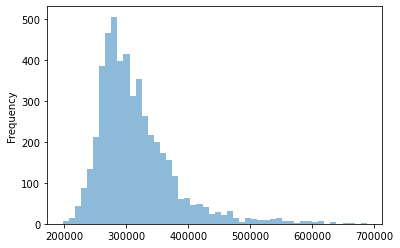

In [20]:
threerm_all[('resale_price')][threerm_all.year_only==2017].plot(kind='hist', bins=50, alpha=0.5,label=2017)

In [247]:
threerm_all[threerm_all.year_only==2017]

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year_only
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,2017
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,2017
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,2017
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,2017
5,2017-01-01,ANG MO KIO,3 ROOM,150,ANG MO KIO AVE 5,01 TO 03,68.0,New Generation,1981,63 years,275000.0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
20439,2017-12-01,YISHUN,3 ROOM,456,YISHUN ST 41,04 TO 06,67.0,Model A,2013,94 years 08 months,290000.0,2017
20440,2017-12-01,YISHUN,3 ROOM,632,YISHUN ST 61,10 TO 12,64.0,Simplified,1987,68 years 10 months,290000.0,2017
20441,2017-12-01,YISHUN,3 ROOM,722,YISHUN ST 71,07 TO 09,64.0,Simplified,1987,68 years 09 months,275000.0,2017
20442,2017-12-01,YISHUN,3 ROOM,714,YISHUN ST 71,04 TO 06,64.0,Simplified,1988,69 years 03 months,260000.0,2017


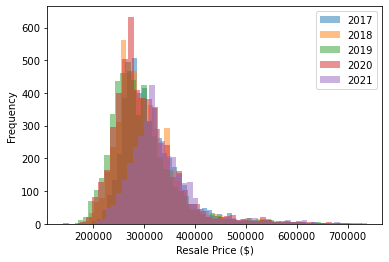

In [17]:
threerm_all[threerm_all.year_only==2017]['resale_price'].plot(kind='hist', bins=50, alpha=0.5,label=2017)
threerm_all[threerm_all.year_only==2018]['resale_price'].plot(kind='hist', bins=50, alpha=0.5,label=2018)
threerm_all[threerm_all.year_only==2019]['resale_price'].plot(kind='hist', bins=50, alpha=0.5,label=2019)
threerm_all[threerm_all.year_only==2020]['resale_price'].plot(kind='hist', bins=50, alpha=0.5,label=2020)
threerm_all[threerm_all.year_only==2021]['resale_price'].plot(kind='hist', bins=50, alpha=0.5,label=2021)

plt.legend()
plt.xlabel('Resale Price ($)')
plt.ticklabel_format(style='plain')

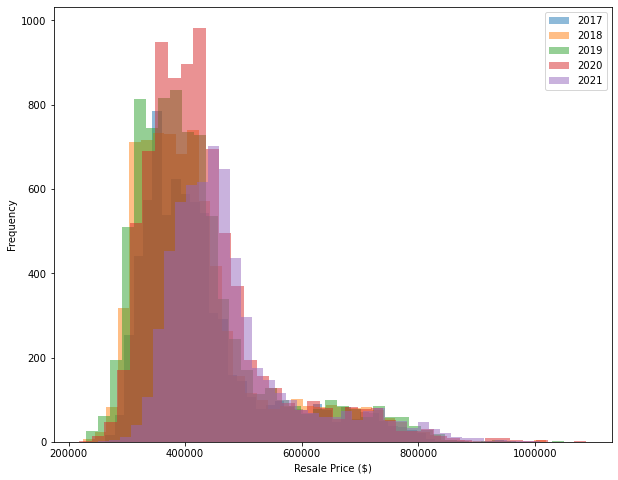

In [213]:
fourrm_all[fourrm_all.year_only==2017]['resale_price'].plot(kind='hist', bins=40, alpha=0.5,label=2017)
fourrm_all[fourrm_all.year_only==2018]['resale_price'].plot(kind='hist', bins=40, alpha=0.5,label=2018)
fourrm_all[fourrm_all.year_only==2019]['resale_price'].plot(kind='hist', bins=40, alpha=0.5,label=2019)
fourrm_all[fourrm_all.year_only==2020]['resale_price'].plot(kind='hist', bins=40, alpha=0.5,label=2020)
fourrm_all[fourrm_all.year_only==2021]['resale_price'].plot(kind='hist', bins=40, alpha=0.5,label=2021)

plt.legend()
plt.xlabel('Resale Price ($)')
plt.ticklabel_format(style='plain')

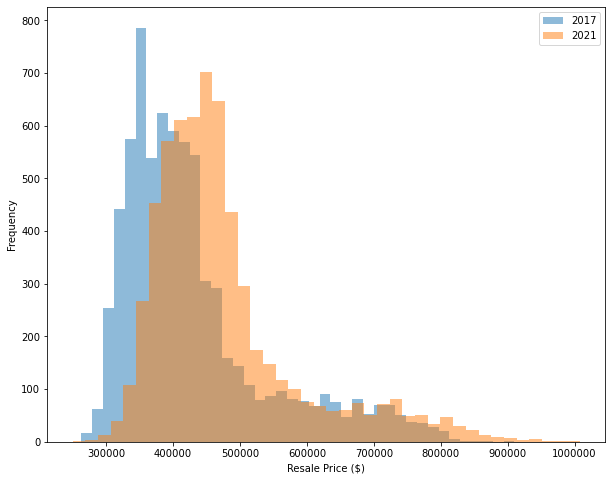

In [231]:
fourrm_all[fourrm_all.year_only==2017]['resale_price'].plot(kind='hist', bins=40, alpha=0.5,label=2017)
fourrm_all[fourrm_all.year_only==2021]['resale_price'].plot(kind='hist', bins=40, alpha=0.5,label=2021)

plt.legend()
plt.xlabel('Resale Price ($)')
plt.ticklabel_format(style='plain')

In [72]:
m1=fourrm_all[fourrm_all.year_only==2017]['resale_price'].median()
m2=fourrm_all[fourrm_all.year_only==2020]['resale_price'].median()
print(m1,m2)

400000.0 410000.0


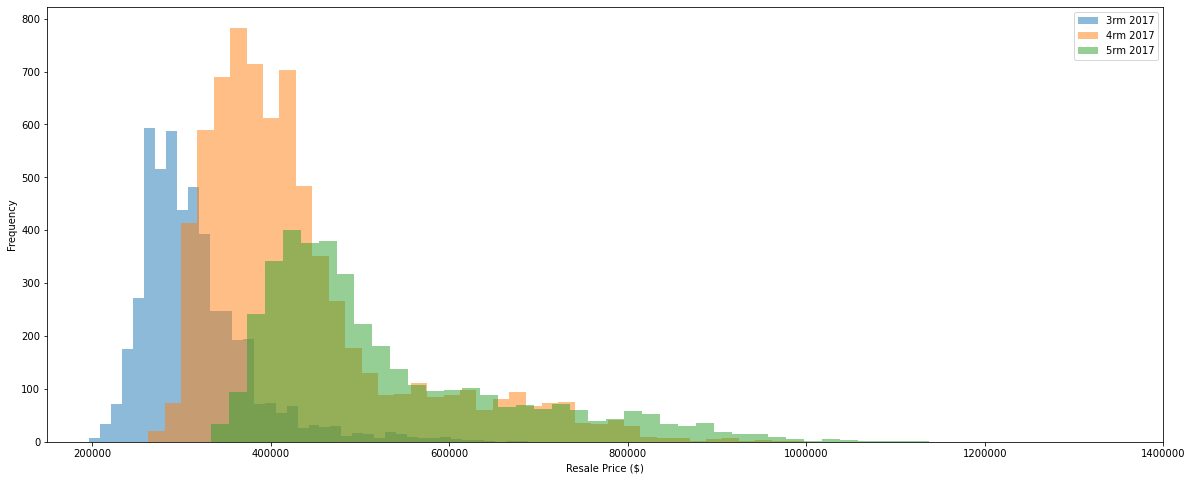

In [90]:
threerm_all[threerm_all.year_only==2017]['resale_price'].plot(kind='hist', bins=40, alpha=0.5,label='3rm 2017')
fourrm_all[fourrm_all.year_only==2017]['resale_price'].plot(kind='hist', bins=40, alpha=0.5,label='4rm 2017')
fiverm_all[fiverm_all.year_only==2017]['resale_price'].plot(kind='hist', bins=40, alpha=0.5,label='5rm 2017')

plt.legend()
plt.xlabel('Resale Price ($)')
plt.xticks(np.arange(200000, 1450000, 200000))
plt.ticklabel_format(style='plain')
plt.rcParams["figure.figsize"] = [20, 8]

In [74]:
m1=threerm_all[threerm_all.year_only==2017]['resale_price'].median()
m2=fourrm_all[fourrm_all.year_only==2017]['resale_price'].median()
m3=fiverm_all[fiverm_all.year_only==2017]['resale_price'].median()

print([m1,m2,m3])

[300000.0, 400000.0, 479000.0]


In [75]:
m1=threerm_all[threerm_all.year_only==2021]['resale_price'].median()
m2=fourrm_all[fourrm_all.year_only==2021]['resale_price'].median()
m3=fiverm_all[fiverm_all.year_only==2021]['resale_price'].median()

print([m1,m2,m3])

[320000.0, 450000.0, 550000.0]


([<matplotlib.axis.XTick at 0x1fdb9f92be0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

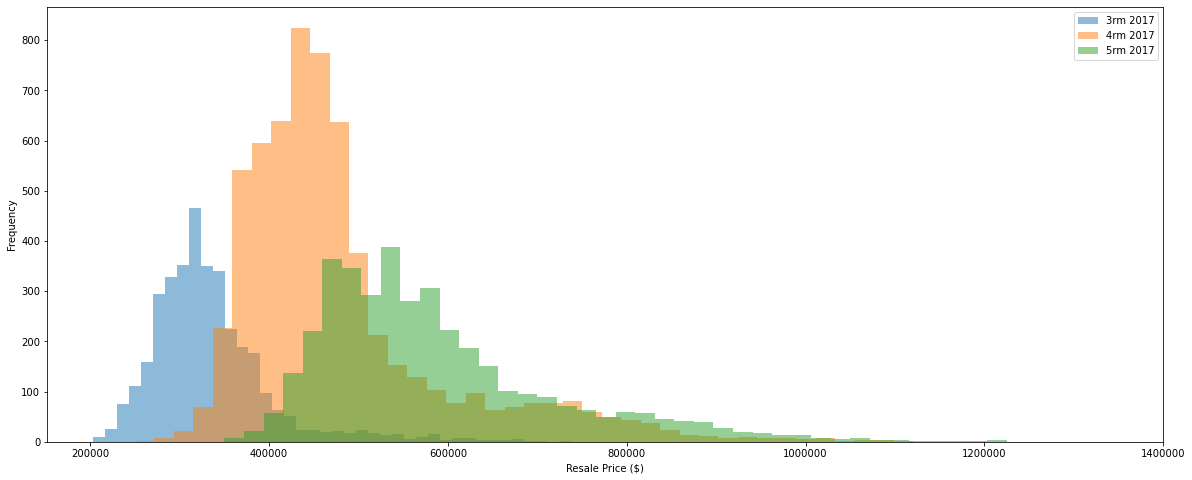

In [91]:
threerm_all[threerm_all.year_only==2021]['resale_price'].plot(kind='hist', bins=40, alpha=0.5,label='3rm 2017')
fourrm_all[fourrm_all.year_only==2021]['resale_price'].plot(kind='hist', bins=40, alpha=0.5,label='4rm 2017')
fiverm_all[fiverm_all.year_only==2021]['resale_price'].plot(kind='hist', bins=40, alpha=0.5,label='5rm 2017')

plt.legend()
plt.xlabel('Resale Price ($)')
plt.ticklabel_format(style='plain')
plt.xticks(np.arange(200000, 1450000, 200000))

Text(0.5, 0, 'Resale Price ($)')

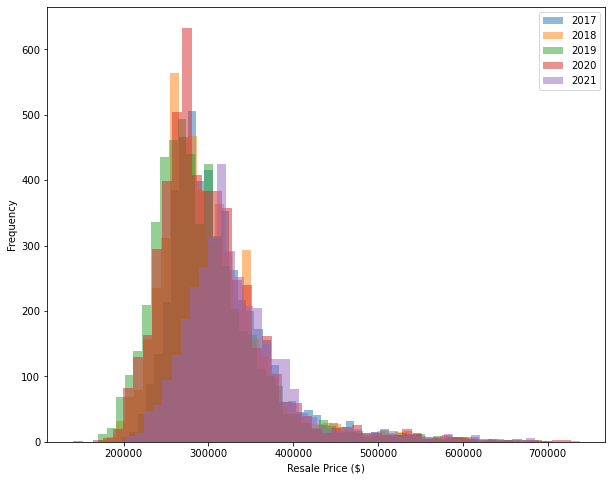

In [214]:
threerm_2017['resale_price'].plot(kind='hist', bins=50, alpha=0.5,label=2017)
threerm_2018['resale_price'].plot(kind='hist', bins=50, alpha=0.5,label=2018)
threerm_2019['resale_price'].plot(kind='hist', bins=50, alpha=0.5,label=2019)
threerm_2020['resale_price'].plot(kind='hist', bins=50, alpha=0.5,label=2020)
threerm_2021['resale_price'].plot(kind='hist', bins=50, alpha=0.5,label=2021)
plt.legend()
plt.xlabel('Resale Price ($)')


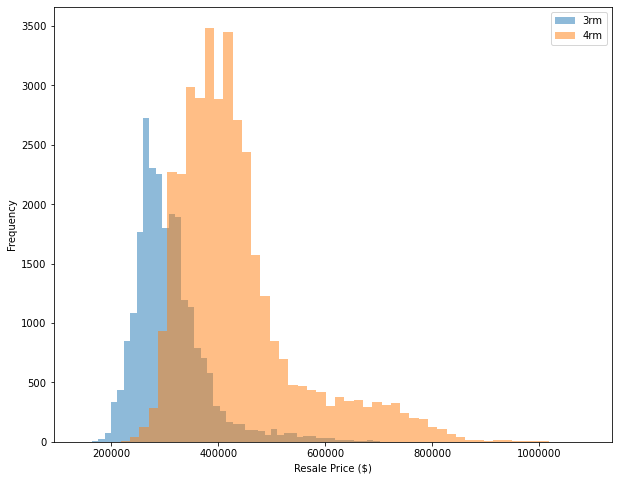

In [183]:
threerm_all['resale_price'].plot(kind='hist', bins=50, alpha=0.5,label='3rm')
fourrm_all['resale_price'].plot(kind='hist', bins=50, alpha=0.5,label='4rm')
plt.legend()
plt.xlabel('Resale Price ($)')
plt.ticklabel_format(useOffset=False,style='plain')

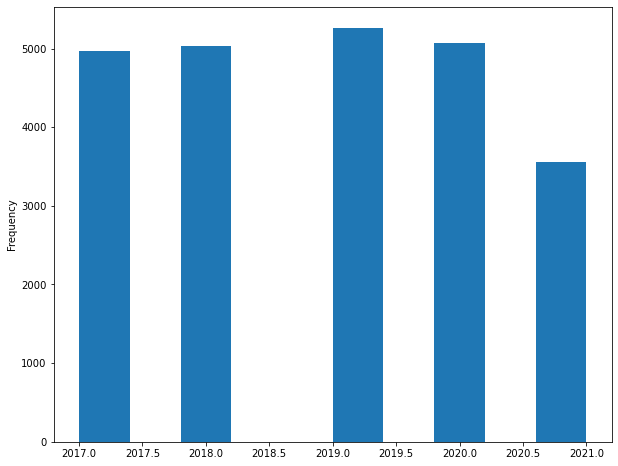

In [134]:
threerm_all.set_index('flat_type').year_only.plot(kind='hist')
plt.ylabel=threerm_all['flat_type']

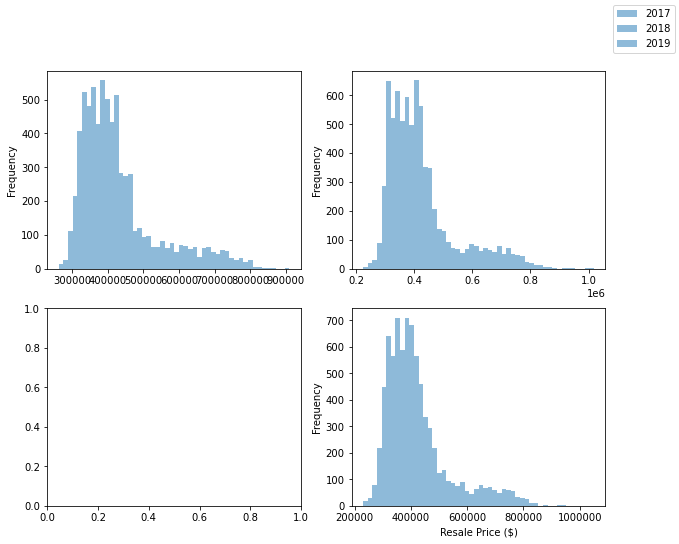

In [165]:
fig, axes=plt.subplots(2,2)
fourrm_2017['resale_price'].plot(kind='hist', bins=50, alpha=0.5,label=2017, ax=axes[0,0])
fourrm_2018['resale_price'].plot(kind='hist', bins=50, alpha=0.5,label=2018, ax=axes[0,1])
fourrm_2019['resale_price'].plot(kind='hist', bins=50, alpha=0.5,label=2019, ax=axes[1,1])
#fourrm_2020['resale_price'].plot(kind='hist', bins=50, alpha=0.5,label=2020)
#fourrm_2021['resale_price'].plot(kind='hist', bins=50, alpha=0.5,label=2021)

fig.legend()
plt.xlabel('Resale Price ($)')
#plt.ylabel('number of houses')
plt.ticklabel_format(useOffset=False,style='plain') #remove scientific numbering

In [320]:
fourrm_all.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year_only
33,2017-01-01,ANG MO KIO,4 ROOM,472,ANG MO KIO AVE 10,10 TO 12,92.0,New Generation,1979,61 years 06 months,400000.0,2017
34,2017-01-01,ANG MO KIO,4 ROOM,475,ANG MO KIO AVE 10,07 TO 09,91.0,New Generation,1979,61 years 06 months,400000.0,2017
35,2017-01-01,ANG MO KIO,4 ROOM,629,ANG MO KIO AVE 4,01 TO 03,94.0,New Generation,1981,63 years 09 months,403000.0,2017
36,2017-01-01,ANG MO KIO,4 ROOM,546,ANG MO KIO AVE 10,01 TO 03,92.0,New Generation,1981,63 years,410000.0,2017
37,2017-01-01,ANG MO KIO,4 ROOM,131,ANG MO KIO AVE 3,01 TO 03,98.0,New Generation,1979,61 years 01 month,425888.0,2017


In [318]:
fourrm_all['flat_model'].unique()

array(['New Generation', 'Simplified', 'Improved', 'Model A', 'Standard',
       'Model A2', 'Adjoined flat'], dtype=object)

Text(0.5, 0, 'Resale Price ($)')

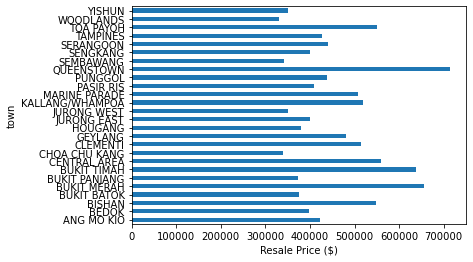

In [339]:
a=fourrm_all.groupby('town')['resale_price'].median()
a.plot(kind='barh')
plt.xlabel('Resale Price ($)')

In [ ]:
#[fourrm_all.year_only==2017]['resale_price']
#a=fourrm_all[fourrm_all.year_only==2017].groupby(['town'])['resale_price'].median().reset_index()


In [18]:
fourrm_2017_median=fourrm_all[fourrm_all.year_only==2017].groupby(['town'])['resale_price'].median().reset_index().sort_values(by='resale_price')
fourrm_2018_median=fourrm_all[fourrm_all.year_only==2018].groupby(['town'])['resale_price'].median().reset_index().sort_values(by='resale_price')
fourrm_2019_median=fourrm_all[fourrm_all.year_only==2019].groupby(['town'])['resale_price'].median().reset_index().sort_values(by='resale_price')
fourrm_2020_median=fourrm_all[fourrm_all.year_only==2020].groupby(['town'])['resale_price'].median().reset_index().sort_values(by='resale_price')
fourrm_2021_median=fourrm_all[fourrm_all.year_only==2021].groupby(['town'])['resale_price'].median().reset_index().sort_values(by='resale_price')

threerm_2017_median=threerm_all[threerm_all.year_only==2017].groupby(['town'])['resale_price'].median().reset_index().sort_values(by='resale_price')
threerm_2018_median=threerm_all[threerm_all.year_only==2018].groupby(['town'])['resale_price'].median().reset_index().sort_values(by='resale_price')
threerm_2019_median=threerm_all[threerm_all.year_only==2019].groupby(['town'])['resale_price'].median().reset_index().sort_values(by='resale_price')
threerm_2020_median=threerm_all[threerm_all.year_only==2020].groupby(['town'])['resale_price'].median().reset_index().sort_values(by='resale_price')
threerm_2021_median=threerm_all[threerm_all.year_only==2021].groupby(['town'])['resale_price'].median().reset_index().sort_values(by='resale_price')

In [99]:
fiverm_2017_median=fiverm_all[fiverm_all.year_only==2017].groupby(['town'])['resale_price'].median().reset_index().sort_values(by='resale_price')
fiverm_2018_median=fiverm_all[fiverm_all.year_only==2018].groupby(['town'])['resale_price'].median().reset_index().sort_values(by='resale_price')
fiverm_2019_median=fiverm_all[fiverm_all.year_only==2019].groupby(['town'])['resale_price'].median().reset_index().sort_values(by='resale_price')
fiverm_2020_median=fiverm_all[fiverm_all.year_only==2020].groupby(['town'])['resale_price'].median().reset_index().sort_values(by='resale_price')
fiverm_2021_median=fiverm_all[fiverm_all.year_only==2021].groupby(['town'])['resale_price'].median().reset_index().sort_values(by='resale_price')


In [79]:
threerm_all_median_table=threerm_all.groupby(['town'])['resale_price'].median().reset_index()
threerm_all_median_table=threerm_all_median_table.sort_values(by='resale_price')
threerm_all_median_table

,town,resale_price
13,JURONG WEST,260000.0
24,WOODLANDS,260000.0
3,BUKIT BATOK,265000.0
23,TOA PAYOH,270000.0
10,GEYLANG,273000.0
25,YISHUN,275000.0
12,JURONG EAST,285000.0
11,HOUGANG,286500.0
1,BEDOK,290000.0
0,ANG MO KIO,293000.0


In [201]:
fourrm_all_median_table=fourrm_all.groupby(['town'])['resale_price'].median().reset_index()
fourrm_all_median_table=fourrm_all_median_table.sort_values(by='town')
fourrm_all_median_table

,town,resale_price
0,ANG MO KIO,425000.0
1,BEDOK,400000.0
2,BISHAN,545000.0
3,BUKIT BATOK,380000.0
4,BUKIT MERAH,670000.0
5,BUKIT PANJANG,400000.0
6,BUKIT TIMAH,643800.0
7,CENTRAL AREA,558500.0
8,CHOA CHU KANG,355000.0
9,CLEMENTI,510000.0


In [61]:
fiverm_all_median_table=fiverm_all.groupby(['town'])['resale_price'].median().reset_index()
fiverm_all_median_table=fiverm_all_median_table.sort_values(by='resale_price')
fiverm_all_median_table

,town,resale_price
19,SEMBAWANG,402000.0
24,WOODLANDS,415000.0
8,CHOA CHU KANG,425000.0
13,JURONG WEST,440000.0
17,PUNGGOL,450000.0
20,SENGKANG,465000.0
25,YISHUN,475000.0
16,PASIR RIS,490000.0
11,HOUGANG,495000.0
5,BUKIT PANJANG,500000.0


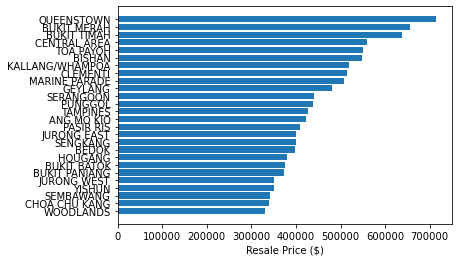

In [42]:
plt.barh(a['town'],a['resale_price'])
plt.xlabel('Resale Price ($)')
plt.tick_params(axis='y')

Text(0.5, 0, 'Resale Price ($)')

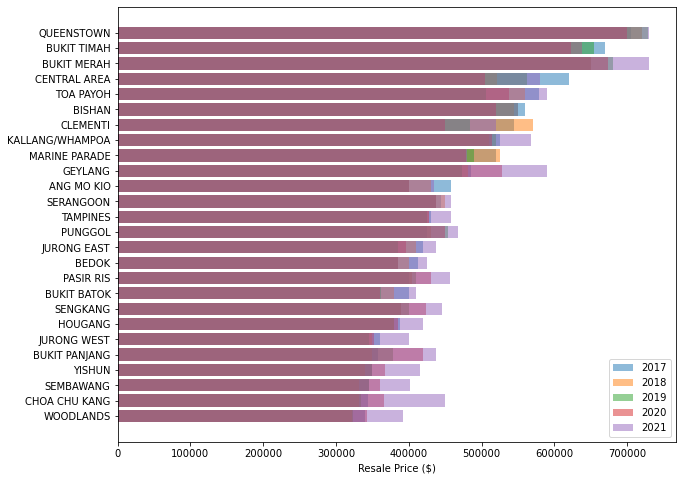

In [230]:
plt.barh(fourrm_2017_median['town'],fourrm_2017_median['resale_price'],alpha=0.5,label=2017)
plt.barh(fourrm_2018_median['town'],fourrm_2018_median['resale_price'],alpha=0.5,label=2018)
plt.barh(fourrm_2019_median['town'],fourrm_2019_median['resale_price'],alpha=0.5,label=2019)
plt.barh(fourrm_2020_median['town'],fourrm_2020_median['resale_price'],alpha=0.5,label=2020)
plt.barh(fourrm_2021_median['town'],fourrm_2021_median['resale_price'],alpha=0.5,label=2021)
plt.legend()
plt.xlabel('Resale Price ($)')

In [ ]:


plt.scatter(x=fourrm_2017_median['resale_price'],y=fourrm_2017_median['town'],label=2017)
plt.scatter(x=fourrm_2018_median['resale_price'],y=fourrm_2018_median['town'],label=2018)
plt.scatter(x=fourrm_2019_median['resale_price'],y=fourrm_2019_median['town'],label=2019)
plt.scatter(x=fourrm_2020_median['resale_price'],y=fourrm_2020_median['town'],label=2020)
plt.scatter(x=fourrm_2021_median['resale_price'],y=fourrm_2021_median['town'],label=2021)

plt.legend()
#plt.xlim([250000, 900000])
plt.xticks(np.arange(250000, 900000, 50000))
plt.grid(linestyle='-', linewidth=1,alpha=0.4,which='major')
#plt.tick_params(axis="y", labelsize=8)
#rcParams["figure.figsize"] (default: [6.4, 4.8])
plt.rcParams["figure.figsize"] = [10, 8]

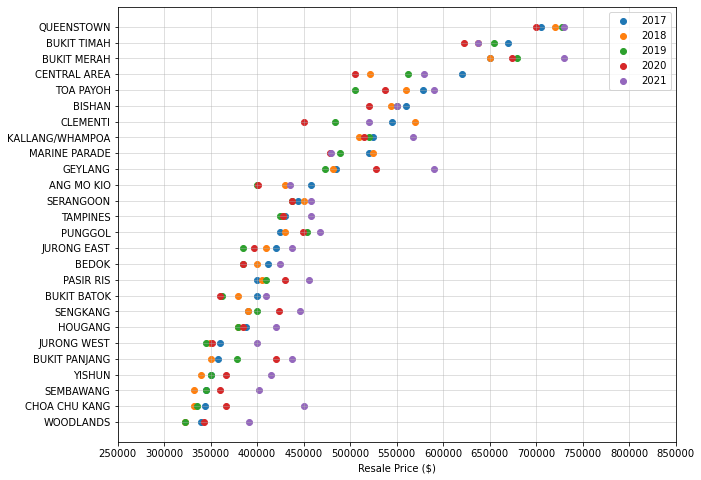

In [21]:
plt.scatter(x=fourrm_2017_median['resale_price'],y=fourrm_2017_median['town'],label=2017)
plt.scatter(x=fourrm_2018_median['resale_price'],y=fourrm_2018_median['town'],label=2018)
plt.scatter(x=fourrm_2019_median['resale_price'],y=fourrm_2019_median['town'],label=2019)
plt.scatter(x=fourrm_2020_median['resale_price'],y=fourrm_2020_median['town'],label=2020)
plt.scatter(x=fourrm_2021_median['resale_price'],y=fourrm_2021_median['town'],label=2021)
plt.legend()
plt.xticks(np.arange(250000, 900000, 50000))
plt.xlabel('Resale Price ($)')
plt.grid(linestyle='-', linewidth=1,alpha=0.4,which='major')
plt.rcParams["figure.figsize"] = [10, 8]

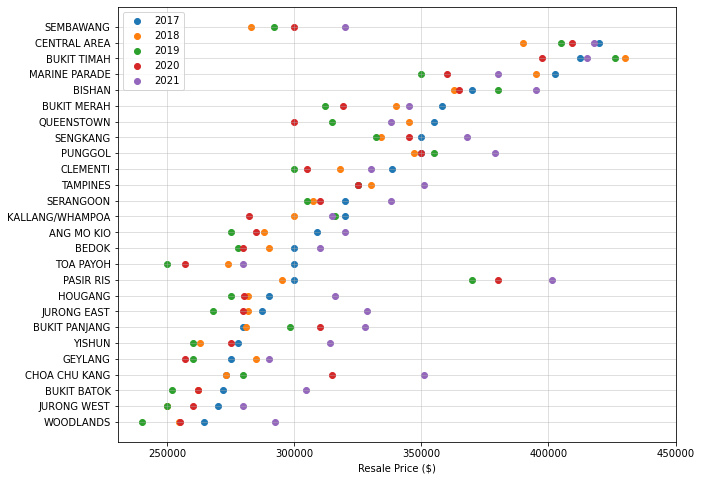

In [80]:
plt.scatter(x=threerm_2017_median['resale_price'],y=threerm_2017_median['town'],label=2017)
plt.scatter(x=threerm_2018_median['resale_price'],y=threerm_2018_median['town'],label=2018)
plt.scatter(x=threerm_2019_median['resale_price'],y=threerm_2019_median['town'],label=2019)
plt.scatter(x=threerm_2020_median['resale_price'],y=threerm_2020_median['town'],label=2020)
plt.scatter(x=threerm_2021_median['resale_price'],y=threerm_2021_median['town'],label=2021)
plt.legend()
plt.xticks(np.arange(250000, 500000, 50000))
plt.xlabel('Resale Price ($)')
plt.grid(linestyle='-', linewidth=1,alpha=0.4,which='major')
plt.rcParams["figure.figsize"] = [10, 8]

In [107]:
fiverm_2017_median['resale_price']

19    408000.0
8     408000.0
24    413000.0
17    425000.0
20    435000.0
13    455000.0
25    466500.0
5     468444.0
16    475000.0
11    476500.0
21    520000.0
12    523888.0
22    525000.0
3     541000.0
1     564000.0
10    636944.0
0     638000.0
14    688000.0
23    688000.0
9     728000.0
2     744000.0
4     748000.0
6     813000.0
18    824000.0
15    842500.0
7     960000.0
Name: resale_price, dtype: float64

AttributeError: This method only works with the ScalarFormatter

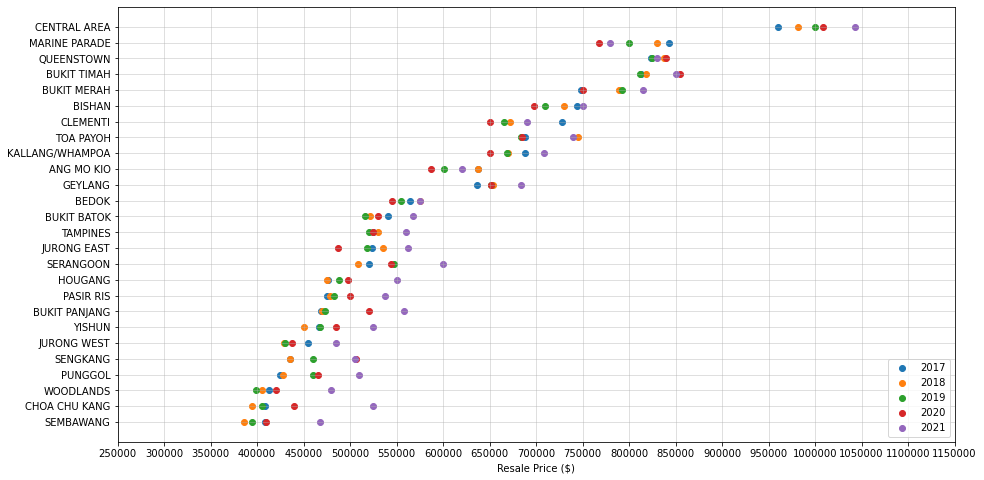

In [106]:
plt.scatter(x=fiverm_2017_median['resale_price'],y=fiverm_2017_median['town'],label=2017)
plt.scatter(x=fiverm_2018_median['resale_price'],y=fiverm_2018_median['town'],label=2018)
plt.scatter(x=fiverm_2019_median['resale_price'],y=fiverm_2019_median['town'],label=2019)
plt.scatter(x=fiverm_2020_median['resale_price'],y=fiverm_2020_median['town'],label=2020)
plt.scatter(x=fiverm_2021_median['resale_price'],y=fiverm_2021_median['town'],label=2021)
plt.legend()
plt.xticks(np.arange(250000, 1200000, 50000))
plt.xlabel('Resale Price ($)')
plt.grid(linestyle='-', linewidth=1,alpha=0.4,which='major')
plt.rcParams["figure.figsize"] = [15, 8]
plt.legend(loc='lower right')
plt.ticklabel_format(useOffset=False,style='plain') 

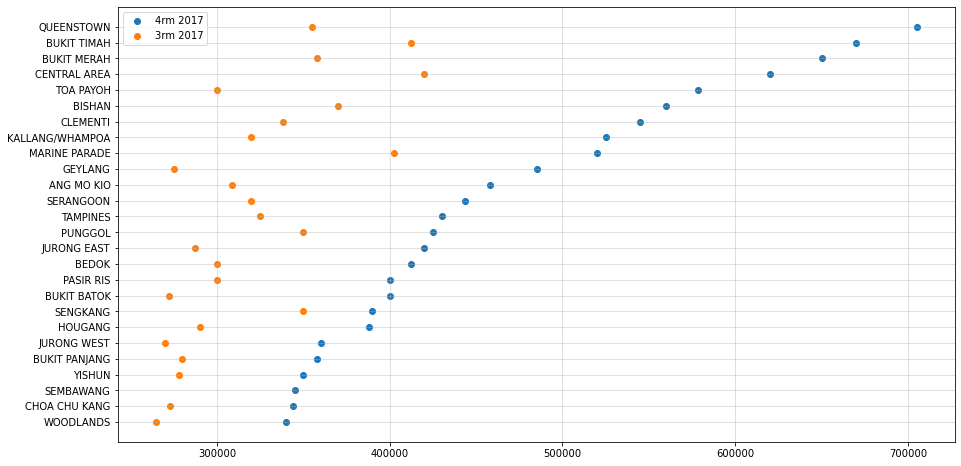

In [105]:
plt.scatter(x=fourrm_2017_median['resale_price'],y=fourrm_2017_median['town'],label='4rm 2017')
#plt.scatter(x=fourrm_2018_median['resale_price'],y=fourrm_2018_median['town'],label='4rm 2018')
#plt.scatter(x=fourrm_2019_median['resale_price'],y=fourrm_2019_median['town'],label='4rm 2019')
#plt.scatter(x=fourrm_2020_median['resale_price'],y=fourrm_2020_median['town'],label='4rm 2020')
#plt.scatter(x=fourrm_2021_median['resale_price'],y=fourrm_2021_median['town'],label='4rm 2021')

plt.scatter(x=threerm_2017_median['resale_price'],y=threerm_2017_median['town'],label='3rm 2017')
#plt.scatter(x=threerm_2018_median['resale_price'],y=threerm_2018_median['town'],label='3rm 2018')
#plt.scatter(x=threerm_2019_median['resale_price'],y=threerm_2019_median['town'],label='3rm 2019')
#plt.scatter(x=threerm_2020_median['resale_price'],y=threerm_2020_median['town'],label='3rm 2020')
#plt.scatter(x=threerm_2021_median['resale_price'],y=threerm_2021_median['town'],label='3rm 2021')

plt.legend()
plt.grid(linestyle='-', linewidth=1,alpha=0.4,which='major')

AttributeError: This method only works with the ScalarFormatter

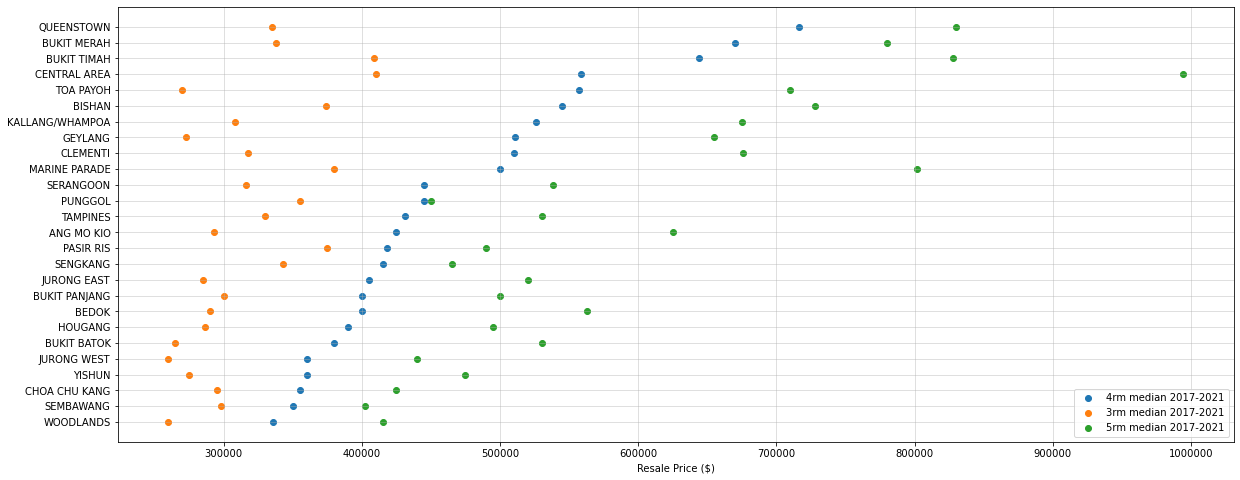

In [65]:
fourrm_all_median=fourrm_all.groupby(['town'])['resale_price'].median().reset_index().sort_values(by='resale_price')
threerm_all_median=threerm_all.groupby(['town'])['resale_price'].median().reset_index().sort_values(by='resale_price')
fiverm_all_median=fiverm_all.groupby(['town'])['resale_price'].median().reset_index().sort_values(by='resale_price')

plt.scatter(x=fourrm_all_median['resale_price'],y=fourrm_all_median['town'],label='4rm median 2017-2021')
plt.scatter(x=threerm_all_median['resale_price'],y=threerm_all_median['town'],label='3rm median 2017-2021')
plt.scatter(x=fiverm_all_median['resale_price'],y=fiverm_all_median['town'],label='5rm median 2017-2021')

plt.legend(loc='lower right')
plt.grid(linestyle='-', linewidth=1,alpha=0.4,which='major')
plt.xlabel('Resale Price ($)')
plt.ticklabel_format(useOffset=False,style='plain')

In [232]:
fourrm_all.head(1)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year_only
33,2017-01-01,ANG MO KIO,4 ROOM,472,ANG MO KIO AVE 10,10 TO 12,92.0,New Generation,1979,61 years 06 months,400000.0,2017


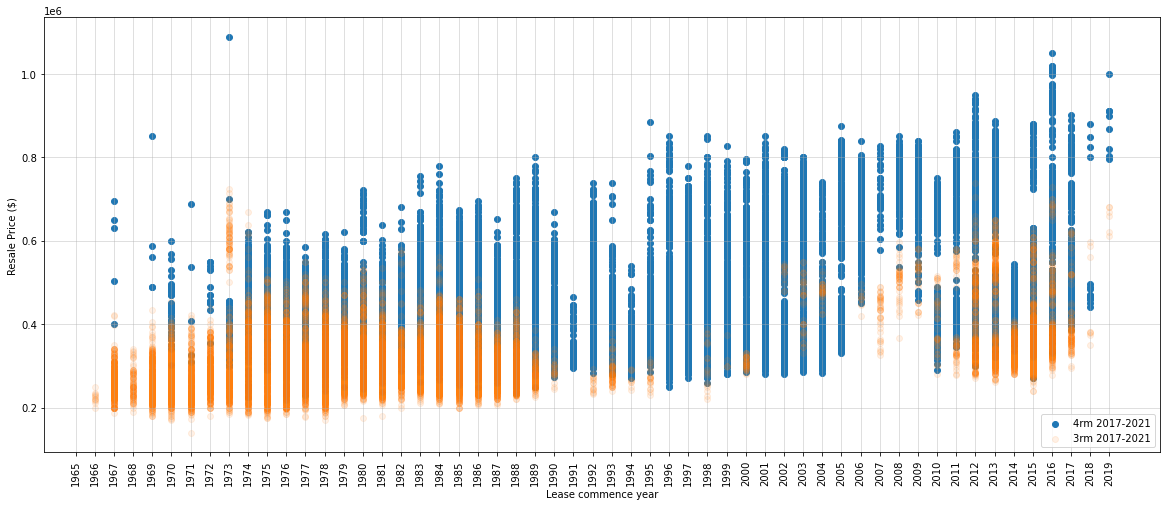

In [54]:
plt.scatter(x=fourrm_all['lease_commence_date'],y=fourrm_all['resale_price'],label='4rm 2017-2021')
plt.scatter(x=threerm_all['lease_commence_date'],y=threerm_all['resale_price'],label='3rm 2017-2021',alpha=0.1)
plt.legend()
plt.xlabel('Lease commence year')
plt.ylabel('Resale Price ($)')
plt.xticks(np.arange(1965, 2020, 1))
plt.xticks(rotation=90)
plt.grid(linestyle='-', linewidth=1,alpha=0.4,which='major')
plt.rcParams["figure.figsize"] = [20, 8]
plt.legend(loc='lower right')


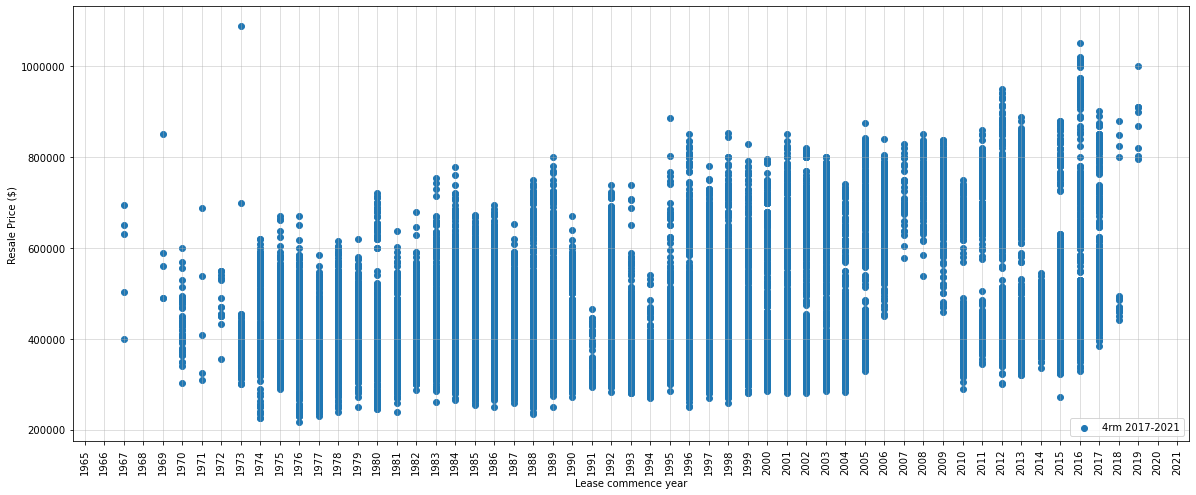

In [55]:
plt.scatter(x=fourrm_all['lease_commence_date'],y=fourrm_all['resale_price'],label='4rm 2017-2021')
plt.legend()
plt.xlabel('Lease commence year')
plt.ylabel('Resale Price ($)')
plt.xticks(np.arange(1965, 2022, 1))
plt.xticks(rotation=90)
plt.legend(loc='lower right')
plt.grid(linestyle='-', linewidth=1,alpha=0.4,which='major')
plt.rcParams["figure.figsize"] = [20, 8]
plt.ticklabel_format(useOffset=False,style='plain')

In [28]:
threerm_all['flat_model'].unique()

array(['New Generation', 'Improved', 'Simplified', 'Model A', 'Standard'],
      dtype=object)

In [30]:
threerm_all['lease_commence_date'].unique()

array([1978, 1980, 1981, 1979, 1976, 1977, 1988, 1985, 1986, 1974, 1984,
       1983, 1973, 1987, 1998, 1975, 1970, 1969, 1971, 1982, 2013, 1989,
       1967, 1968, 1972, 2000, 2007, 1966, 2004, 2012, 1992, 1999, 2010,
       2003, 2011, 1994, 1990, 2009, 2008, 1993, 2014, 2015, 1995, 2002,
       2006, 2016, 2019, 2017, 2018], dtype=int64)

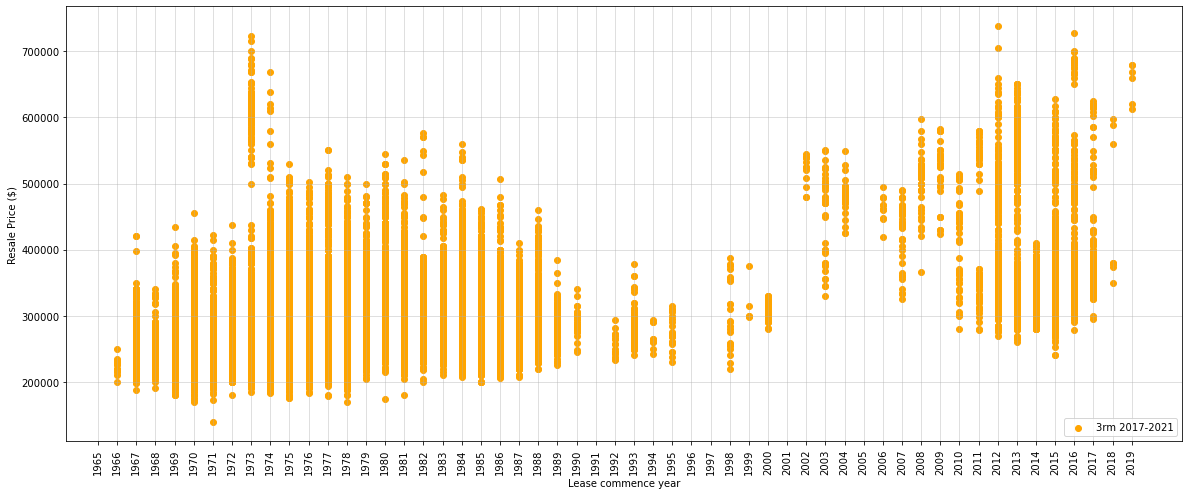

In [48]:
plt.scatter(x=threerm_all['lease_commence_date'],y=threerm_all['resale_price'],label='3rm 2017-2021',color='orange')
plt.legend()
plt.xlabel('Lease commence year')
plt.ylabel('Resale Price ($)')
plt.xticks(np.arange(1965, 2020, 1))
plt.legend(loc='lower right')
plt.xticks(rotation=90)
plt.grid(linestyle='-', linewidth=1,alpha=0.4,which='major')
plt.rcParams["figure.figsize"] = [20, 8]

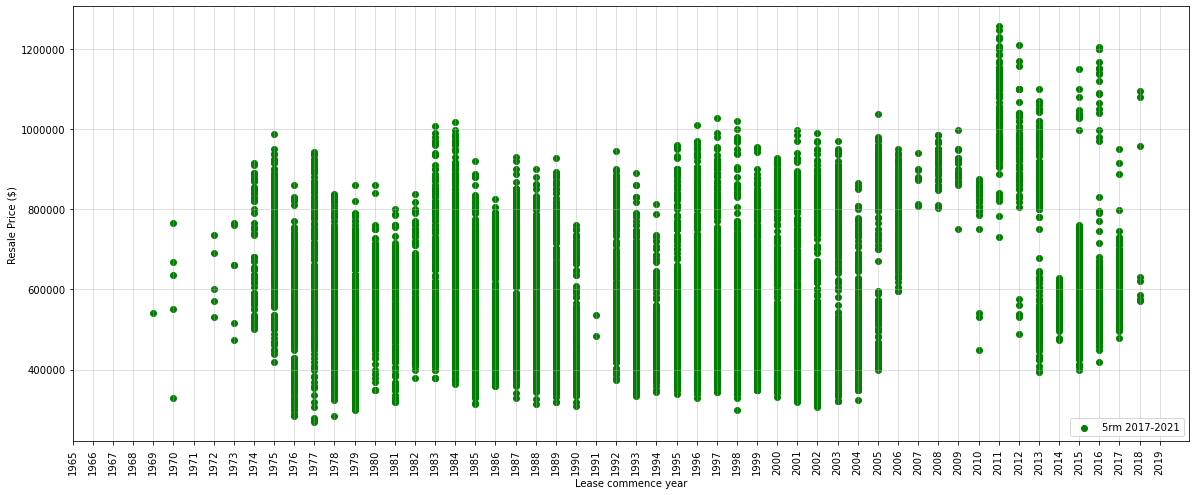

In [109]:
plt.scatter(x=fiverm_all['lease_commence_date'],y=fiverm_all['resale_price'],label='5rm 2017-2021',color='green')
plt.legend()
plt.xlabel('Lease commence year')
plt.ylabel('Resale Price ($)')
plt.xticks(np.arange(1965, 2020, 1))
plt.legend(loc='lower right')
plt.xticks(rotation=90)
plt.grid(linestyle='-', linewidth=1,alpha=0.4,which='major')
plt.rcParams["figure.figsize"] = [20, 8]
plt.ticklabel_format(useOffset=False,style='plain')

<AxesSubplot:xlabel='resale_price', ylabel='town'>

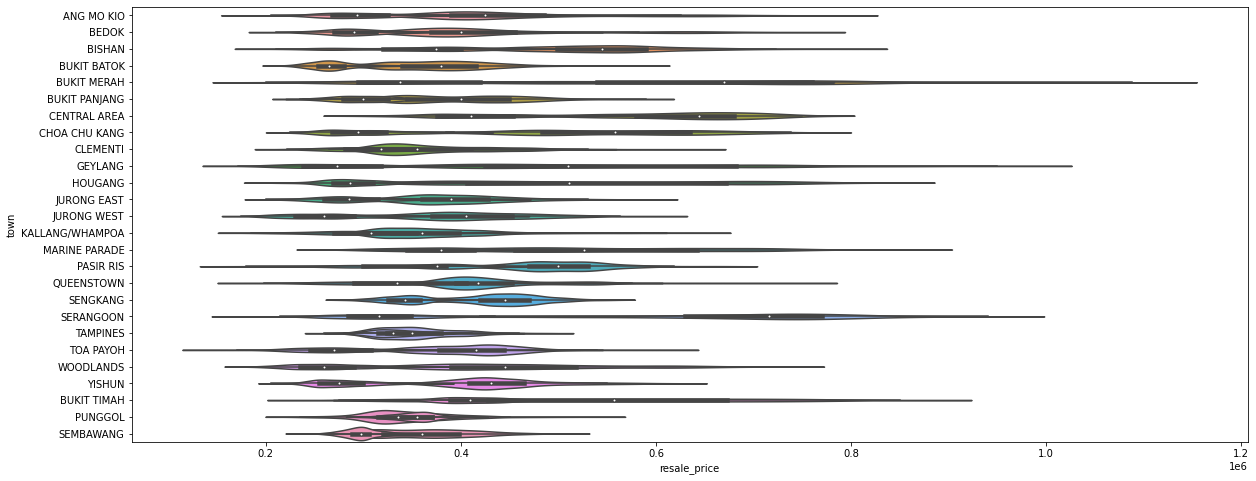

In [42]:
sns.violinplot(x=fourrm_all['resale_price'],y=fourrm_all['town'],label='4rm')
sns.violinplot(x=threerm_all['resale_price'],y=threerm_all['town'],label='3rm')

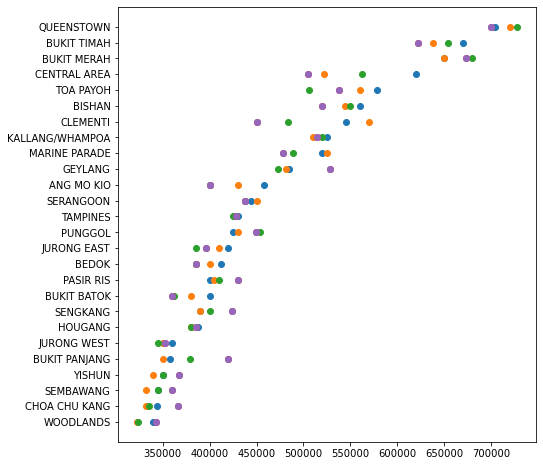

In [103]:
plt.scatter(x=fourrm_2017_median['resale_price'],y=fourrm_2017_median['town'],label=2017)
plt.scatter(x=fourrm_2018_median['resale_price'],y=fourrm_2018_median['town'],label=2018)
plt.scatter(x=fourrm_2019_median['resale_price'],y=fourrm_2019_median['town'],label=2019)
plt.scatter(x=fourrm_2020_median['resale_price'],y=fourrm_2020_median['town'],label=2020)
plt.scatter(x=fourrm_2020_median['resale_price'],y=fourrm_2020_median['town'],label=2020)

ValueError: x and y must be the same size

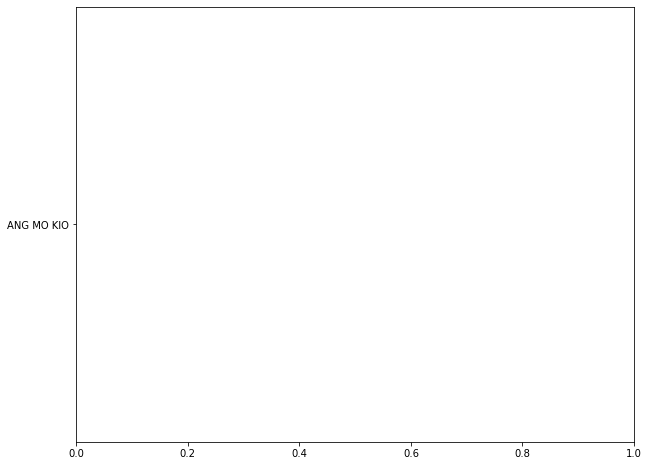

In [196]:
plt.scatter(x=fourrm_all['resale_price'].median(),y=fourrm_all['town'],label='4rm')
plt.scatter(x=threerm_all['resale_price'].median(),y=threerm_all['town'],label='3rm')

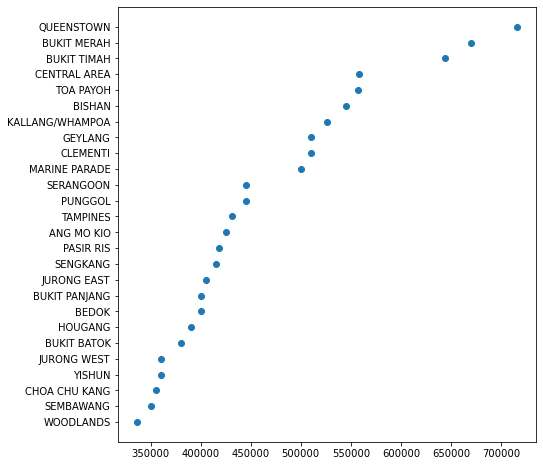

In [104]:
plt.scatter(x=a['resale_price'],y=a['town'])

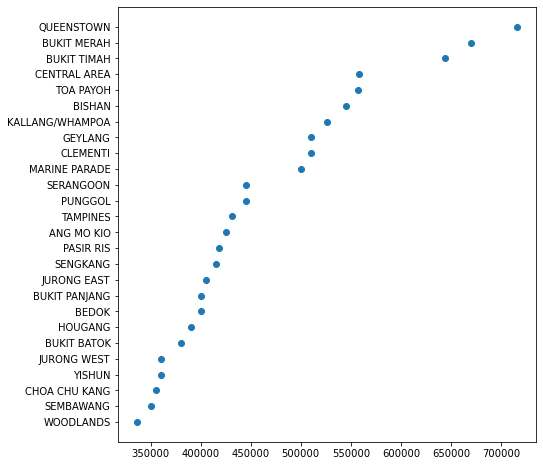

In [105]:
plt.scatter(x=a['resale_price'],y=a['town'])
#fig, ax = plt.subplots()

In [445]:
fourrm_all.set_index('town', inplace=True)

In [468]:
fourrm_all

,month,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year_only
town,,,,,,,,,,,
ANG MO KIO,2017-01-01,4 ROOM,472,ANG MO KIO AVE 10,10 TO 12,92.0,New Generation,1979,61 years 06 months,400000.0,2017
ANG MO KIO,2017-01-01,4 ROOM,475,ANG MO KIO AVE 10,07 TO 09,91.0,New Generation,1979,61 years 06 months,400000.0,2017
ANG MO KIO,2017-01-01,4 ROOM,629,ANG MO KIO AVE 4,01 TO 03,94.0,New Generation,1981,63 years 09 months,403000.0,2017
ANG MO KIO,2017-01-01,4 ROOM,546,ANG MO KIO AVE 10,01 TO 03,92.0,New Generation,1981,63 years,410000.0,2017
ANG MO KIO,2017-01-01,4 ROOM,131,ANG MO KIO AVE 3,01 TO 03,98.0,New Generation,1979,61 years 01 month,425888.0,2017
...,...,...,...,...,...,...,...,...,...,...,...
YISHUN,2020-09-01,4 ROOM,835,YISHUN ST 81,01 TO 03,104.0,Model A,1987,66 years 04 months,370000.0,2020
YISHUN,2020-09-01,4 ROOM,820,YISHUN ST 81,01 TO 03,103.0,Model A,1988,67 years,375000.0,2020
YISHUN,2020-09-01,4 ROOM,880,YISHUN ST 81,01 TO 03,104.0,Model A,1988,66 years 08 months,313000.0,2020


In [290]:
plt.(x=fourrm_all['town']['resale_price'].unique(),y=['town'].unique())

KeyError: 'town'

In [260]:
b=threerm_all.groupby('town')['resale_price'].median()
b

town
ANG MO KIO         288000.0
BEDOK              285000.0
BISHAN             371500.0
BUKIT BATOK        262500.0
BUKIT MERAH        338444.0
BUKIT PANJANG      290000.0
BUKIT TIMAH        410000.0
CENTRAL AREA       409444.0
CHOA CHU KANG      279800.0
CLEMENTI           314444.0
GEYLANG            270000.0
HOUGANG            280288.0
JURONG EAST        280000.0
JURONG WEST        255944.0
KALLANG/WHAMPOA    308000.0
MARINE PARADE      380000.0
PASIR RIS          371000.0
PUNGGOL            350000.0
QUEENSTOWN         336000.0
SEMBAWANG          295000.0
SENGKANG           340000.0
SERANGOON          313000.0
TAMPINES           325000.0
TOA PAYOH          270000.0
WOODLANDS          255000.0
YISHUN             270000.0
Name: resale_price, dtype: float64

In [175]:
b=fourrm_all.groupby('town')['resale_price'].median()
b

town
ANG MO KIO         425000.0
BEDOK              400000.0
BISHAN             545000.0
BUKIT BATOK        380000.0
BUKIT MERAH        670000.0
BUKIT PANJANG      400000.0
BUKIT TIMAH        643800.0
CENTRAL AREA       558500.0
CHOA CHU KANG      355000.0
CLEMENTI           510000.0
GEYLANG            510500.0
HOUGANG            390000.0
JURONG EAST        405000.0
JURONG WEST        360000.0
KALLANG/WHAMPOA    526000.0
MARINE PARADE      500000.0
PASIR RIS          418000.0
PUNGGOL            445000.0
QUEENSTOWN         716000.0
SEMBAWANG          350000.0
SENGKANG           415000.0
SERANGOON          445000.0
TAMPINES           431000.0
TOA PAYOH          557000.0
WOODLANDS          336000.0
YISHUN             360000.0
Name: resale_price, dtype: float64

<AxesSubplot:ylabel='Frequency'>

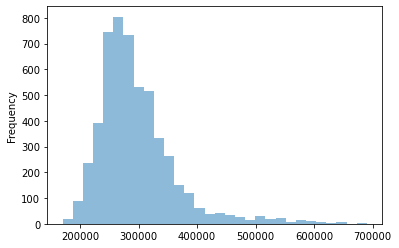

In [186]:
threerm_2019['resale_price'].plot(kind='hist', bins=30, alpha=0.5,label=2019)

In [ ]:
threerm_2017['resale_price'].hist(threerm_2017['re'])

<AxesSubplot:ylabel='Frequency'>

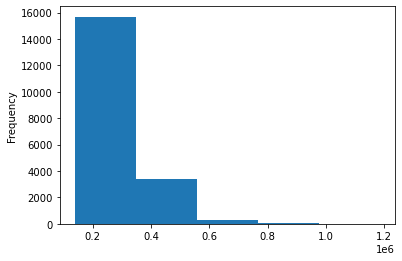

In [83]:
threerm['resale_price'].plot(kind='hist', bins=5)

[Text(0.5, 0, 'Year'), Text(0, 0.5, 'Resale Price ($)')]

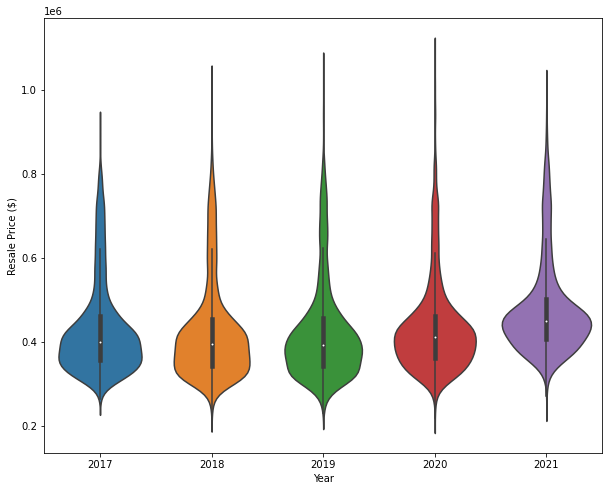

In [219]:
sns.violinplot(x=fourrm_all['year_only'], y=fourrm_all['resale_price'], data=fourrm_all).set(xlabel='Year',ylabel='Resale Price ($)')

[Text(0.5, 0, 'Year'), Text(0, 0.5, 'Resale Price ($)')]

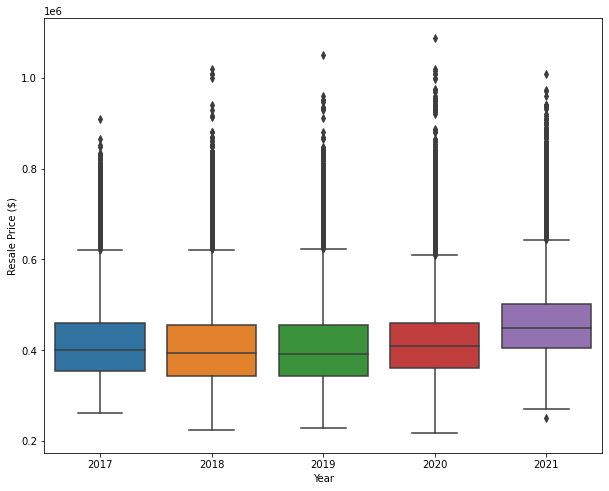

In [220]:
sns.boxplot(x=fourrm_all['year_only'], y=fourrm_all['resale_price'], data=fourrm_all).set(xlabel='Year',ylabel='Resale Price ($)')

<AxesSubplot:xlabel='resale_price', ylabel='year_only'>

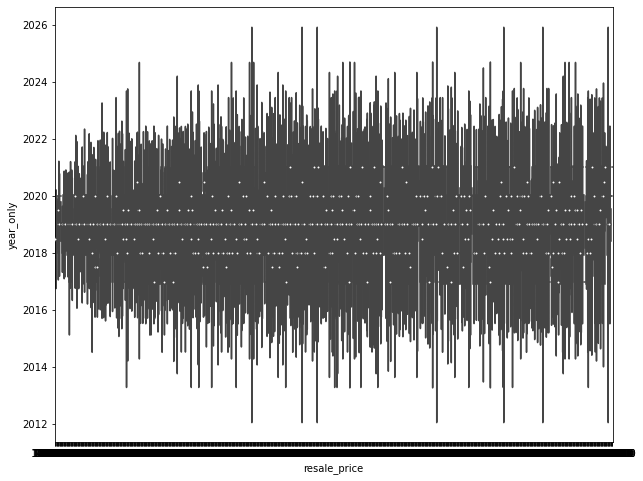

In [172]:
sns.violinplot(x=threerm_all['resale_price'], y=threerm_all['year_only'], data=threerm_all)


<AxesSubplot:xlabel='year_only', ylabel='resale_price'>

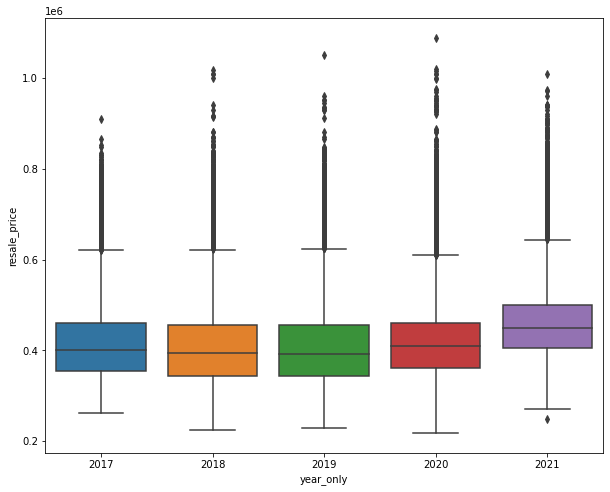

In [173]:
sns.boxplot(x=fourrm_all['year_only'], y=fourrm_all['resale_price'], data=fourrm_all)

<AxesSubplot:xlabel='year_only', ylabel='resale_price'>

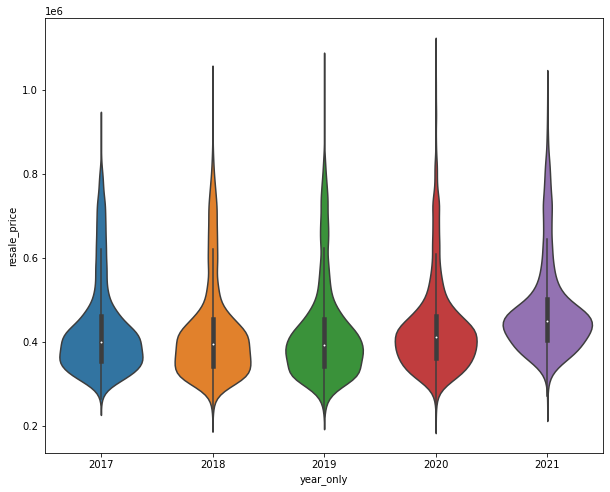

In [174]:
sns.violinplot(x=fourrm_all['year_only'], y=fourrm_all['resale_price'], data=fourrm_all)

<AxesSubplot:xlabel='year_only', ylabel='resale_price'>

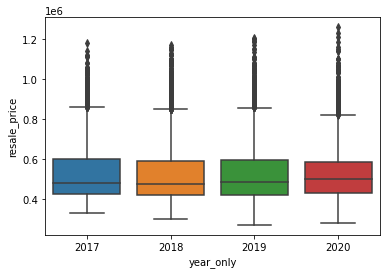

In [77]:
sns.boxplot(x=fiverm['year_only'], y=fiverm['resale_price'], data=fiverm)

<AxesSubplot:xlabel='year_only', ylabel='resale_price'>

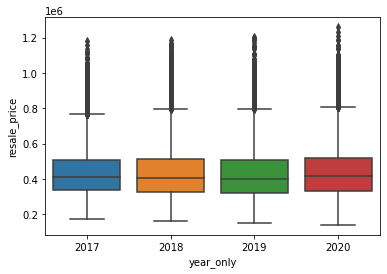

In [68]:
sns.boxplot(x=df['year_only'], y=df['resale_price'], data=df)